In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', 40)
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
data = pd.read_csv('media prediction and its cost.csv')
data.head(3)

food_category food_department food_family  store_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                      7.36   
1  Breakfast Foods    Frozen Foods        Food                      5.52   
2  Breakfast Foods    Frozen Foods        Food                      3.68   

   store_cost(in millions)  unit_sales(in millions)         promotion_name  \
0                   2.7232                        4           Bag Stuffers   
1                   2.5944                        3  Cash Register Lottery   
2                   1.3616                        2    High Roller Savings   

  sales_country marital_status gender  total_children            education  \
0           USA              M      F               1  Partial High School   
1           USA              M      M               0     Bachelors Degree   
2           USA              S      F               4  Partial High School   

  member_card      occupation houseowner  avg_cars_at home(approx)  \
0      Normal  Skilled Manual          Y                         1   
1      Silver    Professional          Y                         4   
2      Normal          Manual          N                         1   

  avg. yearly_income  num_children_at_home  avg_cars_at home(approx).1  \
0        $10K - $30K                     1                           1   
1        $50K - $70K                     0                           4   
2        $10K - $30K                     0                           1   

   brand_name   SRP  gross_weight  net_weight  recyclable_package  low_fat  \
0  Carrington  1.84          19.7        17.7                   1        0   
1  Carrington  1.84          19.7        17.7                   1        0   
2  Carrington  1.84          19.7        17.7                   1        0   

   units_per_case          store_type store_city store_state  store_sqft  \
0              17  Deluxe Supermarket      Salem          OR       27694   
1              17  Deluxe Supermarket      Salem          OR       27694   
2              17  Deluxe Supermarket      Salem          OR       27694   

   grocery_sqft  frozen_sqft  meat_sqft  coffee_bar  video_store  salad_bar  \
0         18670         5415       3610           1            1          1   
1         18670         5415       3610           1            1          1   
2         18670         5415       3610           1            1          1   

   prepared_food  florist          media_type    cost  
0              1        1  Daily Paper, Radio  126.62  
1              1        1  Daily Paper, Radio   59.86  
2              1        1  Daily Paper, Radio   84.16

In [3]:
data.shape

(60428, 40)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  int64  
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  int64  
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [5]:
categorical_variables = data.select_dtypes(include=['object', 'category'])

# Now, let's list out unique categories for each variable
for column in categorical_variables.columns:
    unique_categories = data[column].unique()
    print(f"Unique categories for variable '{column}':")
    print(unique_categories)
    print()

Unique categories for variable 'food_category':
['Breakfast Foods' 'Bread' 'Canned Shrimp' 'Baking Goods' 'Vegetables'
 'Frozen Desserts' 'Candy' 'Snack Foods' 'Dairy' 'Starchy Foods'
 'Cleaning Supplies' 'Decongestants' 'Meat' 'Hot Beverages'
 'Jams and Jellies' 'Carbonated Beverages' 'Seafood' 'Specialty'
 'Kitchen Products' 'Electrical' 'Beer and Wine' 'Candles' 'Fruit'
 'Pure Juice Beverages' 'Canned Soup' 'Paper Products' 'Canned Tuna'
 'Eggs' 'Hardware' 'Canned Sardines' 'Canned Clams' 'Pain Relievers'
 'Side Dishes' 'Bathroom Products' 'Magazines' 'Frozen Entrees' 'Pizza'
 'Cold Remedies' 'Canned Anchovies' 'Drinks' 'Hygiene' 'Plastic Products'
 'Canned Oysters' 'Packaged Vegetables' 'Miscellaneous']

Unique categories for variable 'food_department':
['Frozen Foods' 'Baked Goods' 'Canned Foods' 'Baking Goods' 'Produce'
 'Snacks' 'Snack Foods' 'Dairy' 'Starchy Foods' 'Household'
 'Health and Hygiene' 'Meat' 'Beverages' 'Seafood' 'Deli'
 'Alcoholic Beverages' 'Canned Products' 'Eg

In [6]:
print('Number of null values in each variable:')
data.isnull().sum()

Number of null values in each variable:


food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [7]:
print('Duplicated records:', data.duplicated().sum())

Duplicated records: 0


There are no null values or duplicated records

# EDA

In [8]:
data.describe().T

count          mean          std         min  \
store_sales(in millions)    60428.0      6.541031     3.463047      0.5100   
store_cost(in millions)     60428.0      2.619460     1.453009      0.1632   
unit_sales(in millions)     60428.0      3.093169     0.827677      1.0000   
total_children              60428.0      2.533875     1.490165      0.0000   
avg_cars_at home(approx)    60428.0      2.200271     1.109644      0.0000   
num_children_at_home        60428.0      0.829351     1.303424      0.0000   
avg_cars_at home(approx).1  60428.0      2.200271     1.109644      0.0000   
SRP                         60428.0      2.115258     0.932829      0.5000   
gross_weight                60428.0     13.806433     4.622693      6.0000   
net_weight                  60428.0     11.796289     4.682986      3.0500   
recyclable_package          60428.0      0.558665     0.496551      0.0000   
low_fat                     60428.0      0.350434     0.477110      0.0000   
units_per_case              60428.0     18.860694    10.258555      1.0000   
store_sqft                  60428.0  27988.477494  5701.022090  20319.0000   
grocery_sqft                60428.0  19133.799696  3987.395735  13305.0000   
frozen_sqft                 60428.0   5312.852552  1575.907263   2452.0000   
meat_sqft                   60428.0   3541.846280  1050.471635   1635.0000   
coffee_bar                  60428.0      0.612646     0.487150      0.0000   
video_store                 60428.0      0.354157     0.478261      0.0000   
salad_bar                   60428.0      0.587956     0.492207      0.0000   
prepared_food               60428.0      0.587956     0.492207      0.0000   
florist                     60428.0      0.562603     0.496069      0.0000   
cost                        60428.0     99.262366    30.011257     50.7900   

                                 25%         50%           75%         max  
store_sales(in millions)        3.81      5.9400      8.670000     22.9200  
store_cost(in millions)         1.50      2.3856      3.484025      9.7265  
unit_sales(in millions)         3.00      3.0000      4.000000      6.0000  
total_children                  1.00      3.0000      4.000000      5.0000  
avg_cars_at home(approx)        1.00      2.0000      3.000000      4.0000  
num_children_at_home            0.00      0.0000      1.000000      5.0000  
avg_cars_at home(approx).1      1.00      2.0000      3.000000      4.0000  
SRP                             1.41      2.1300      2.790000      3.9800  
gross_weight                    9.70     13.6000     17.700000     21.9000  
net_weight                      7.71     11.6000     16.000000     20.8000  
recyclable_package              0.00      1.0000      1.000000      1.0000  
low_fat                         0.00      0.0000      1.000000      1.0000  
units_per_case                 10.00     19.0000     28.000000     36.0000  
store_sqft                  23593.00  27694.0000  30797.000000  39696.0000  
grocery_sqft                16232.00  18670.0000  22123.000000  30351.0000  
frozen_sqft                  4746.00   5062.0000   5751.000000   9184.0000  
meat_sqft                    3164.00   3375.0000   3834.000000   6122.0000  
coffee_bar                      0.00      1.0000      1.000000      1.0000  
video_store                     0.00      0.0000      1.000000      1.0000  
salad_bar                       0.00      1.0000      1.000000      1.0000  
prepared_food                   0.00      1.0000      1.000000      1.0000  
florist                         0.00      1.0000      1.000000      1.0000  
cost                           69.65     98.5200    126.620000    149.7500

In [9]:
# Assuming your DataFrame is named data
mean_cost = data['cost'].mean()
median_cost = data['cost'].median()

print("Mean cost:", mean_cost)
print("Median cost:", median_cost)

Mean cost: 99.26236612166544
Median cost: 98.52


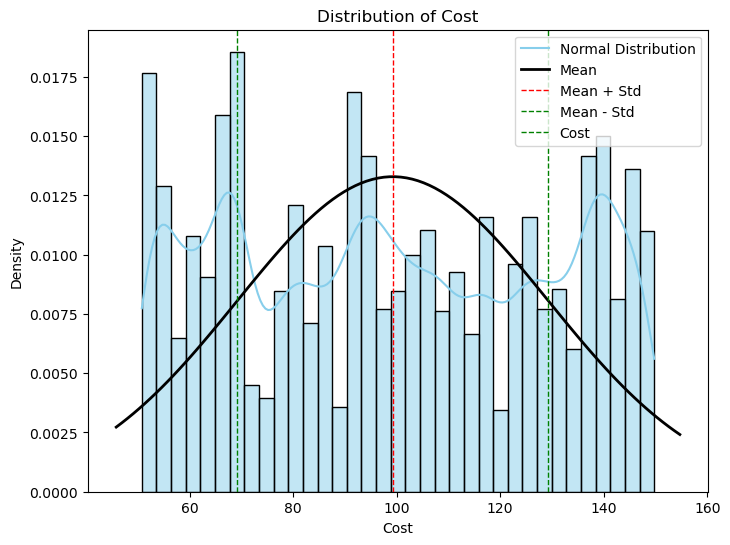

Percentage of data within 1 standard deviation: 55.01%


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Plot histogram of cost
plt.figure(figsize=(8, 6))
sns.histplot(data['cost'], kde=True, stat='density', color='skyblue', edgecolor='black')

# Fit a normal curve
mu, std = norm.fit(data['cost'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'k', linewidth=2)

# Add mean and standard deviation lines
plt.axvline(mu, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mu + std, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mu - std, color='green', linestyle='dashed', linewidth=1)

plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Density')
plt.legend(['Normal Distribution', 'Mean', 'Mean + Std', 'Mean - Std', 'Cost'])
plt.show()

# Calculate mean and standard deviation
mean = data['cost'].mean()
std = data['cost'].std()

# Calculate lower and upper bounds
lower_bound = mean - std
upper_bound = mean + std

# Filter data lying between the boundaries
within_std = data[(data['cost'] >= lower_bound) & (data['cost'] <= upper_bound)]

# Calculate the percentage of data within the boundaries
percentage_within_std = (len(within_std) / len(data)) * 100

print("Percentage of data within 1 standard deviation: {:.2f}%".format(percentage_within_std))


{'whiskers': [<matplotlib.lines.Line2D at 0x1438a450b90>,
 'caps': [<matplotlib.lines.Line2D at 0x1438a312a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1438a393050>],
 'medians': [<matplotlib.lines.Line2D at 0x1438a3081d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1438a308c50>],
 'means': []}

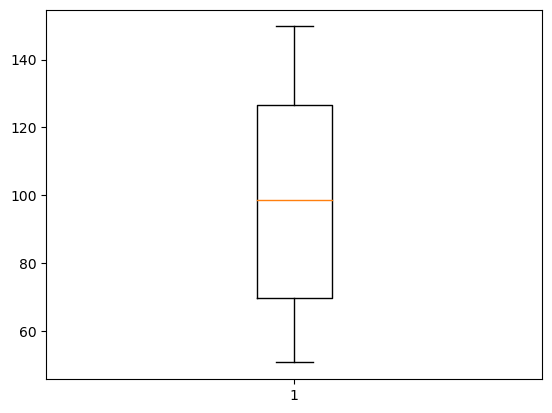

In [11]:
x1 = data['cost']
plt.boxplot(x1)

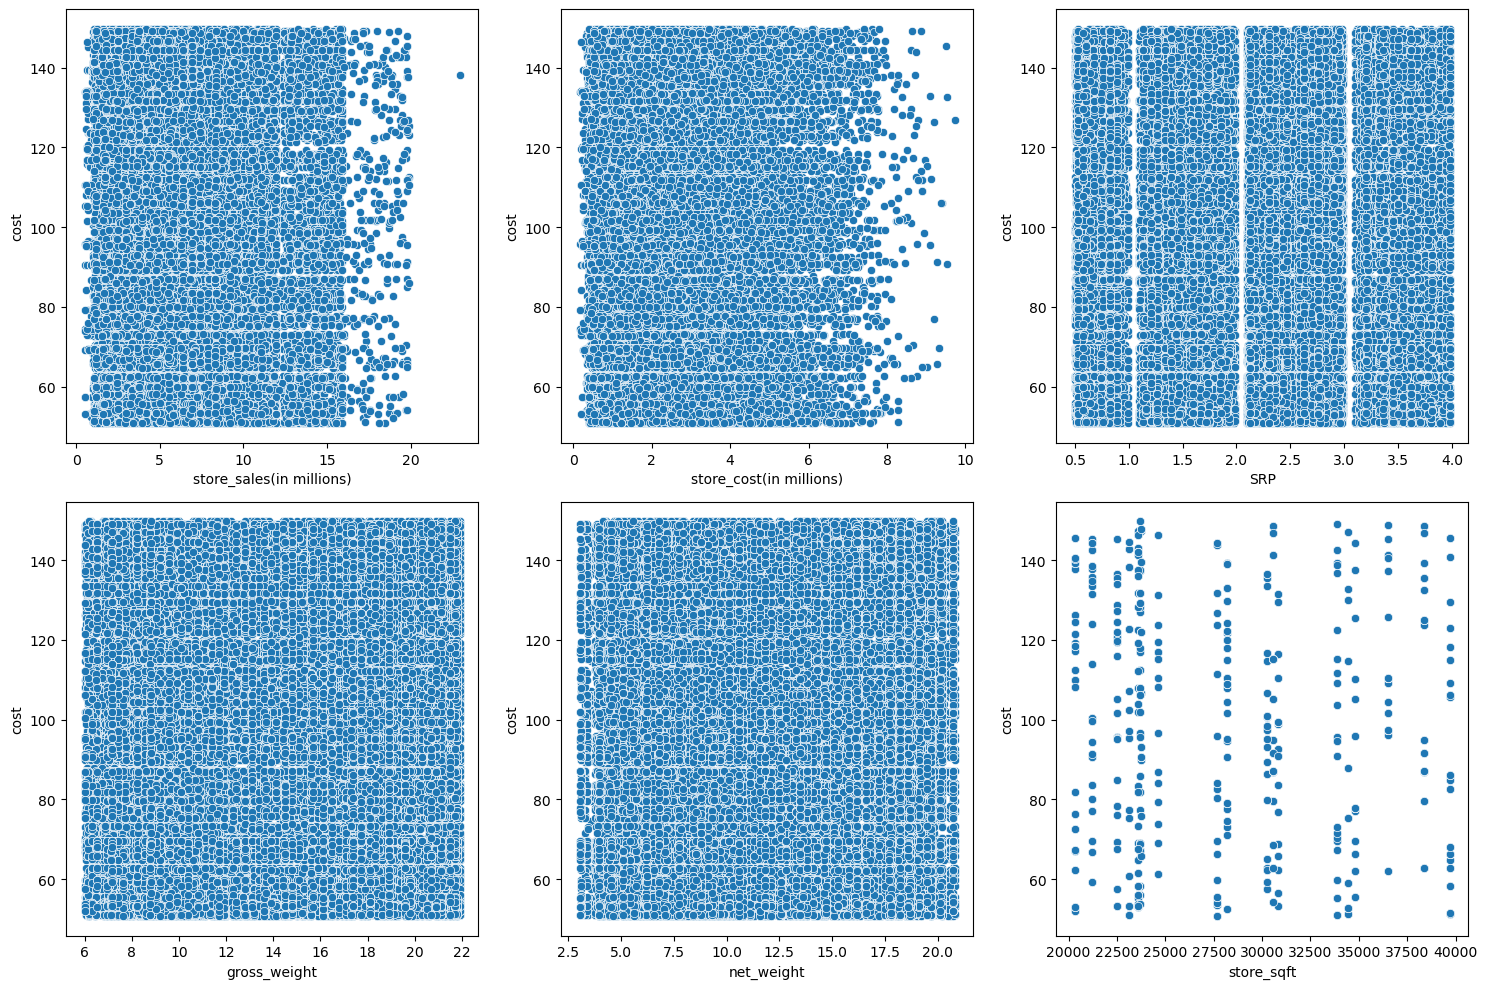

In [12]:

# Scatter plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x='store_sales(in millions)', y='cost', data=data)

plt.subplot(2, 3, 2)
sns.scatterplot(x='store_cost(in millions)', y='cost', data=data)

plt.subplot(2, 3, 3)
sns.scatterplot(x='SRP', y='cost', data=data)

plt.subplot(2, 3, 4)
sns.scatterplot(x='gross_weight', y='cost', data=data)

plt.subplot(2, 3, 5)
sns.scatterplot(x='net_weight', y='cost', data=data)

plt.subplot(2, 3, 6)
sns.scatterplot(x='store_sqft', y='cost', data=data)

plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

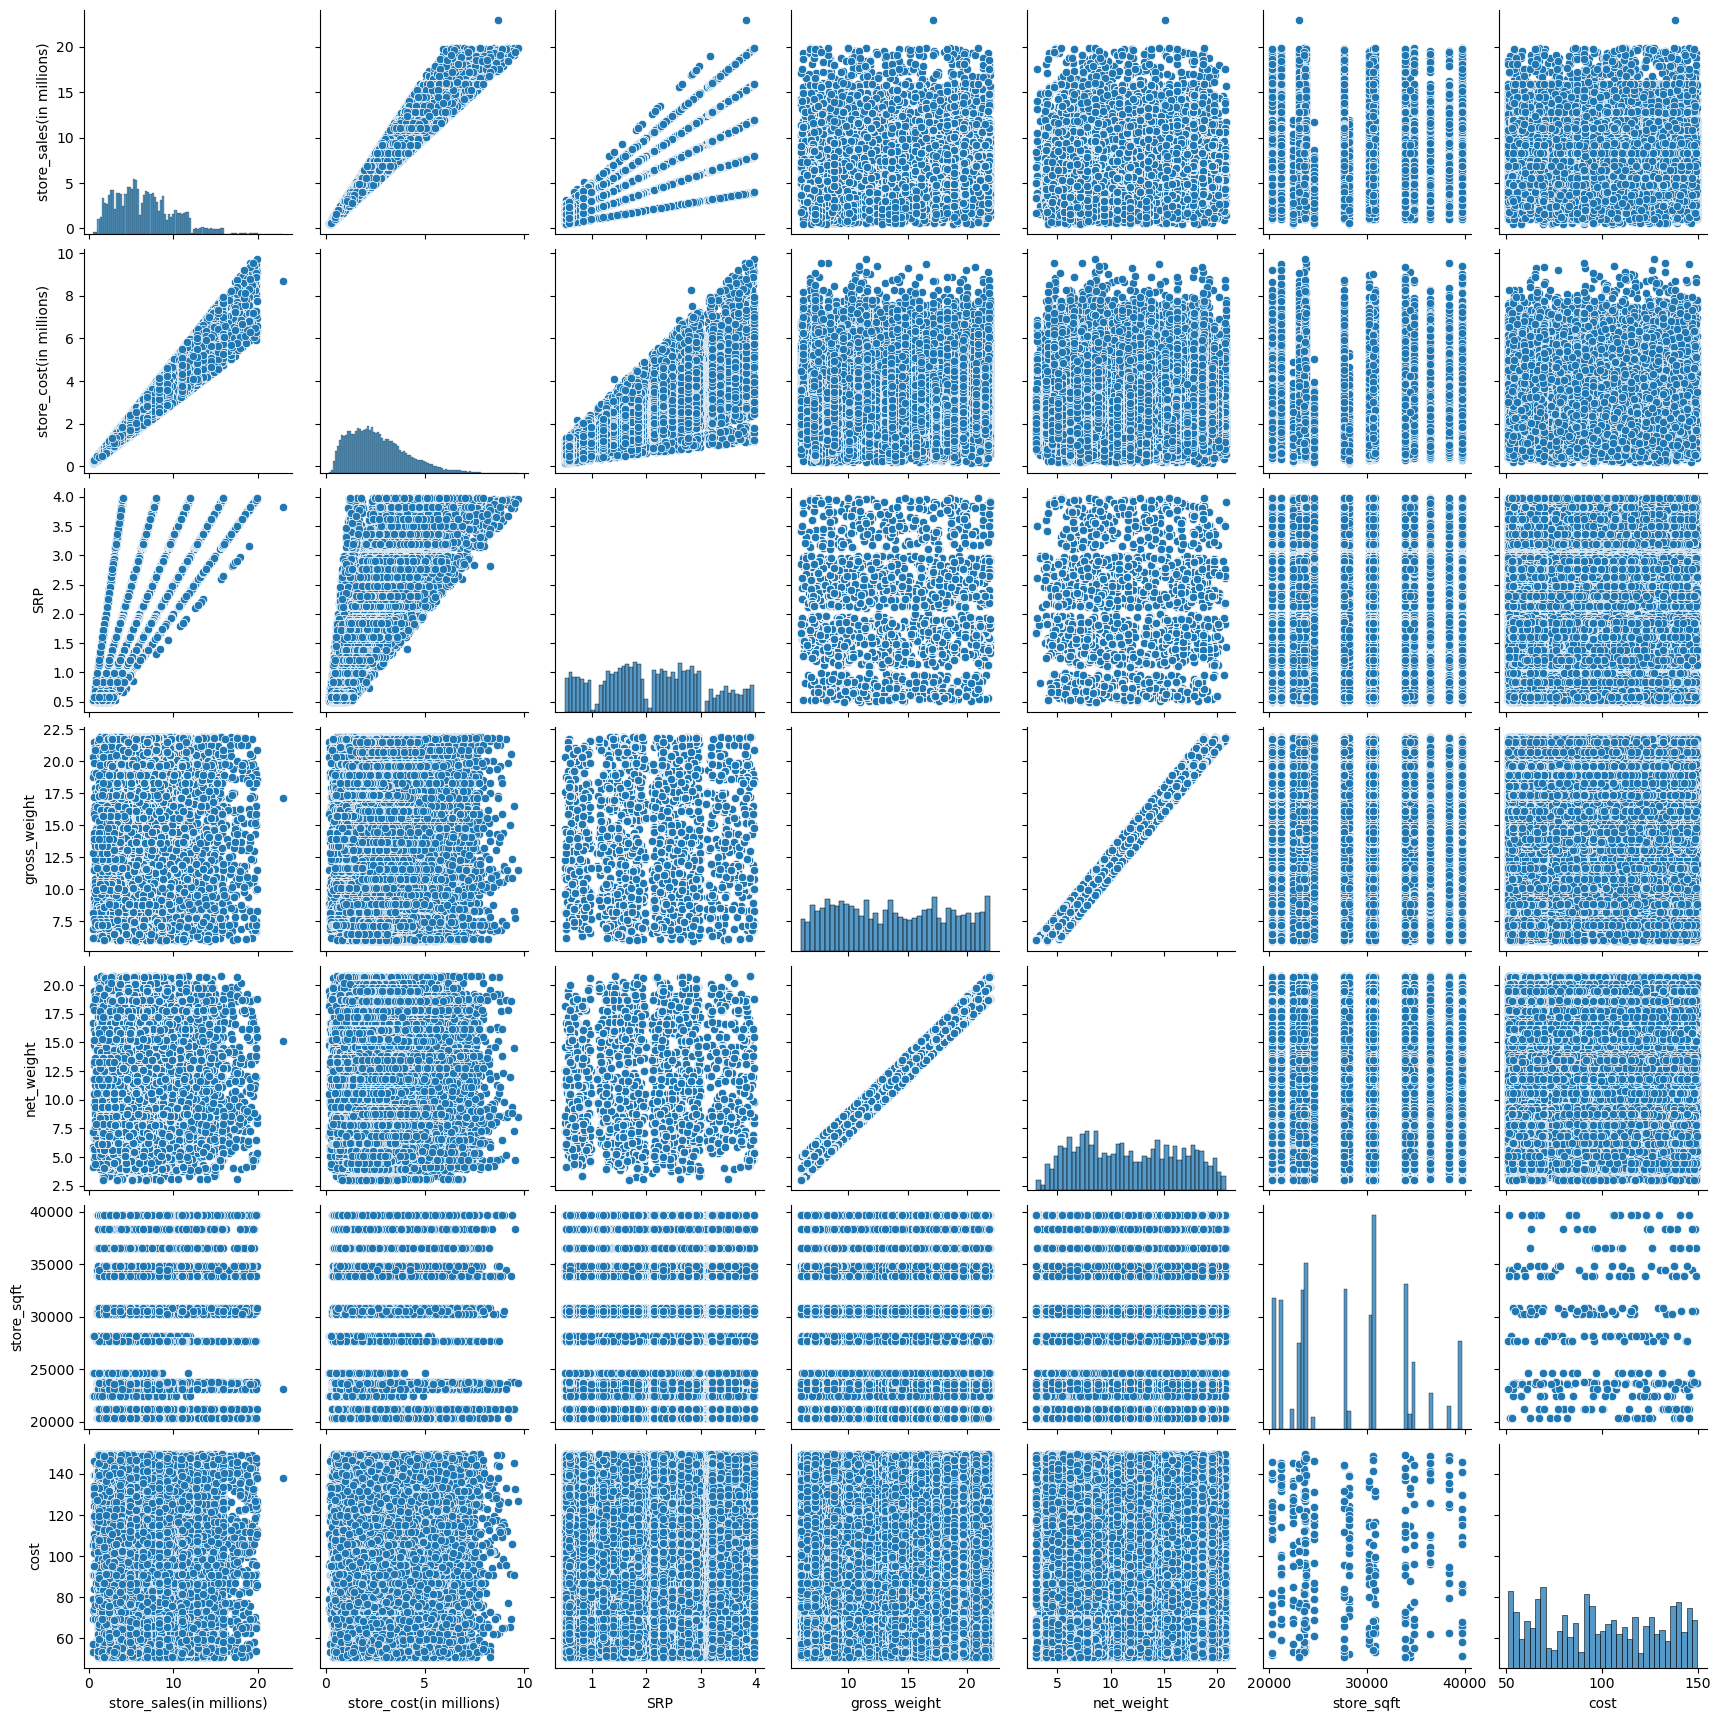

In [13]:
# Pairplot
plt.figure(figsize=(15, 10))
sns.pairplot(data[['store_sales(in millions)', 'store_cost(in millions)', 'SRP', 
                   'gross_weight', 'net_weight', 'store_sqft', 'cost']])
plt.show()


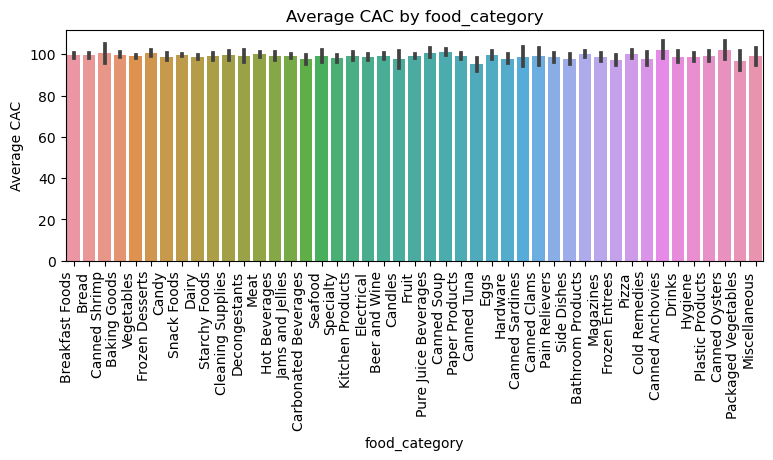

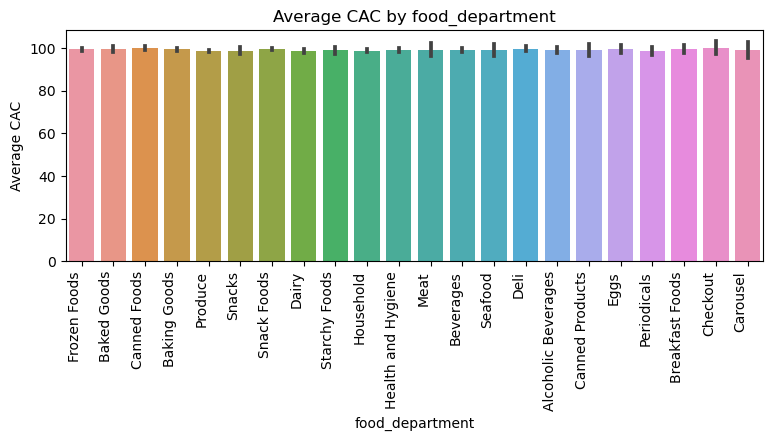

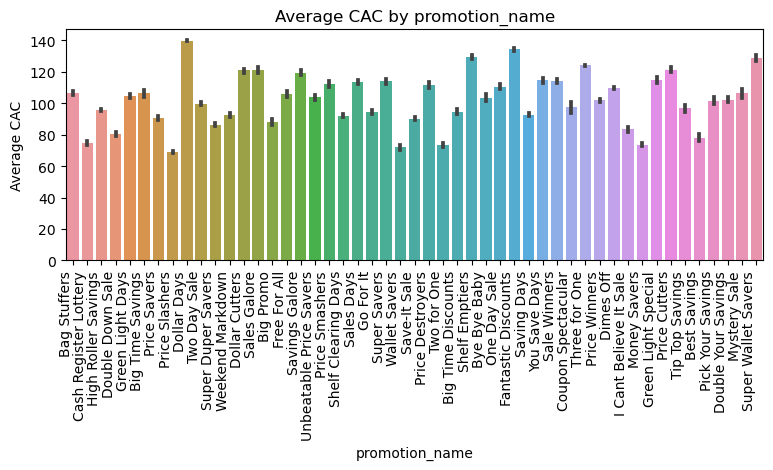

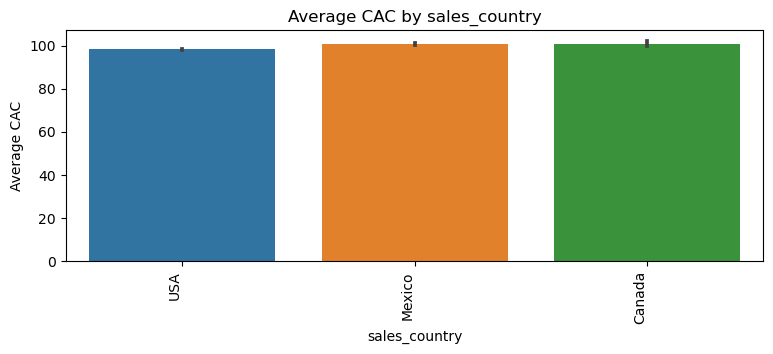

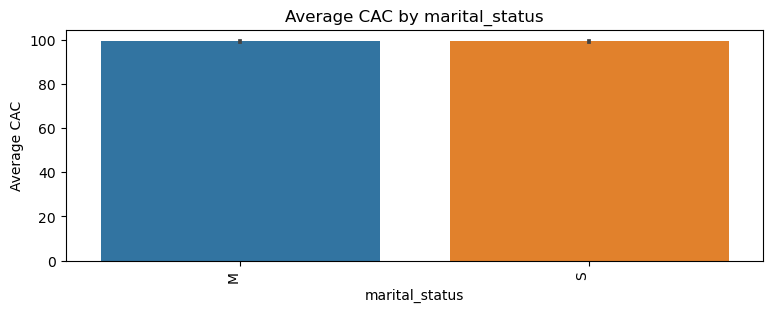

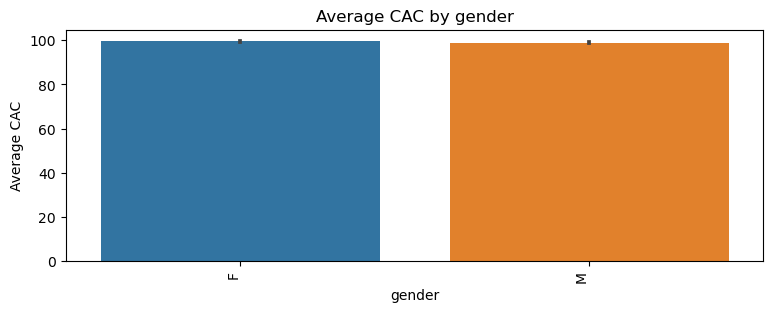

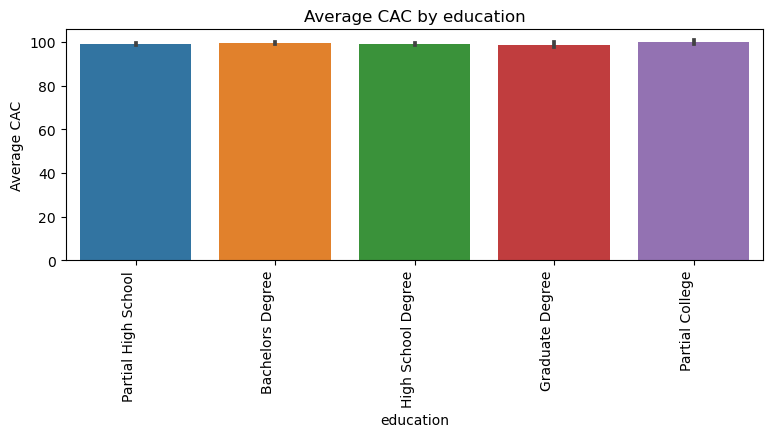

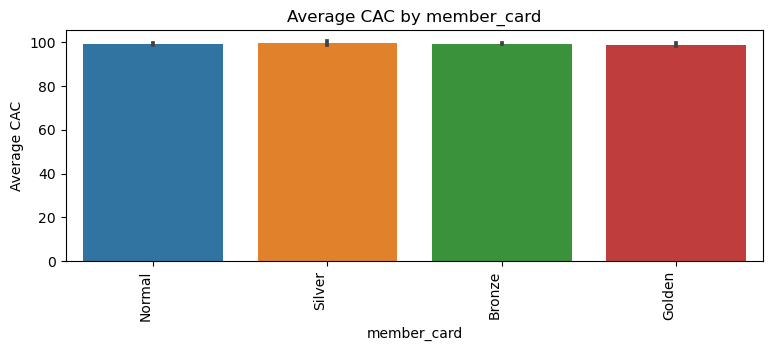

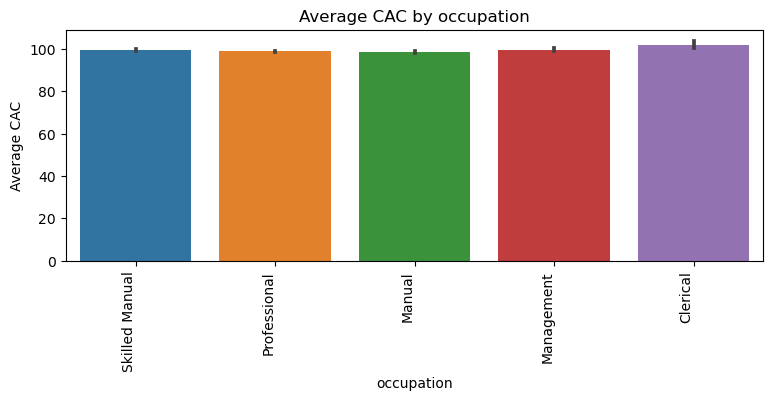

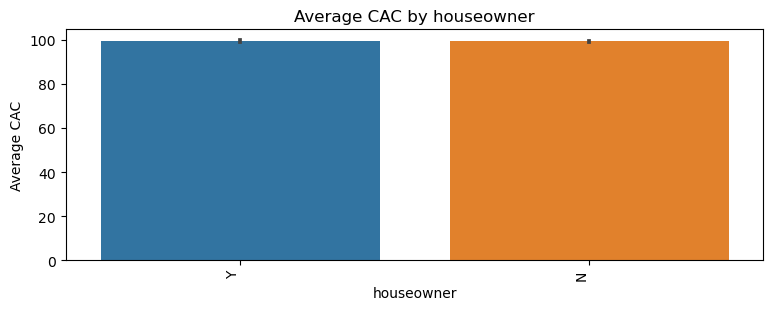

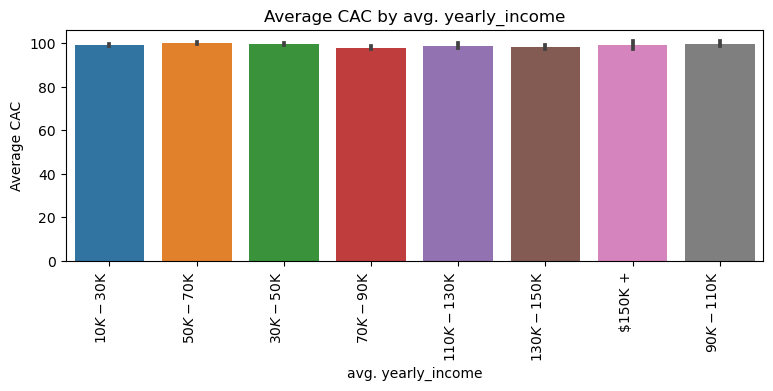

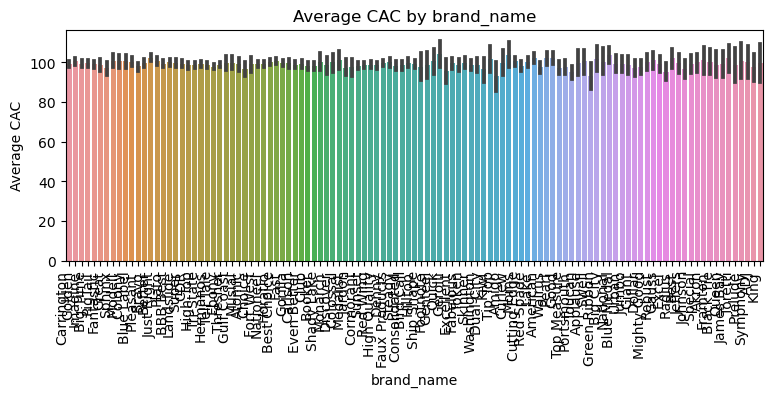

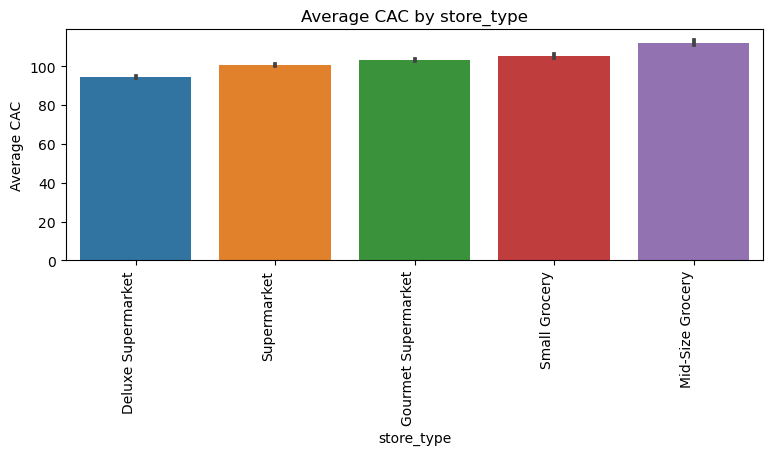

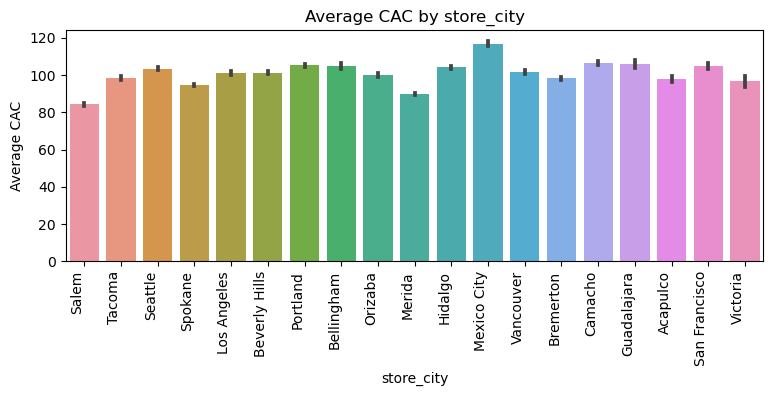

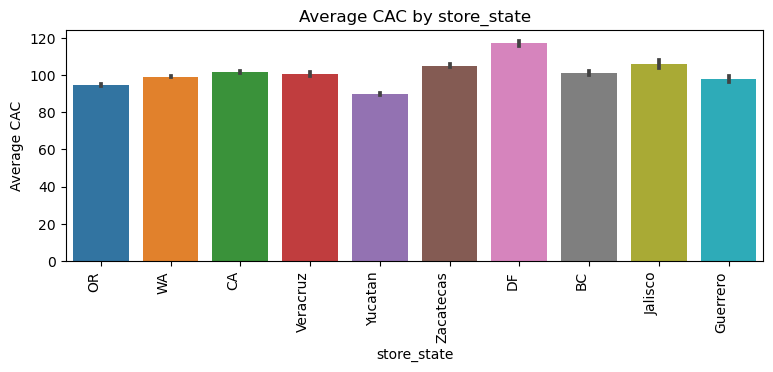

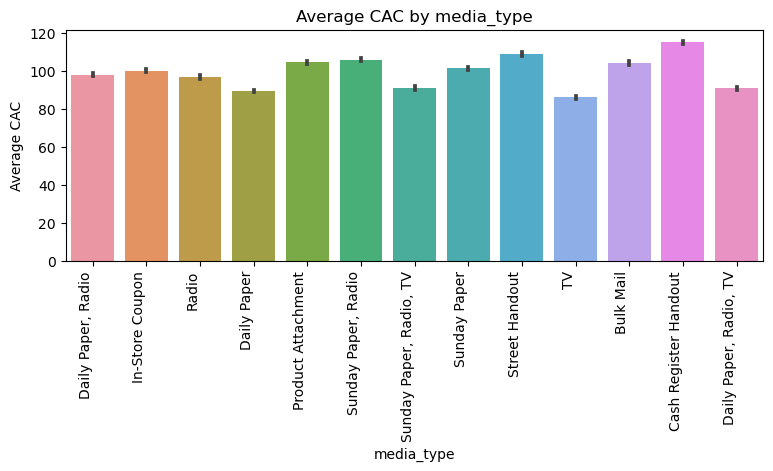

In [14]:
# Bar plot of average CAC for each category of categorical variables
categorical_variables = ['food_category', 'food_department', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'education', 'member_card', 'occupation', 'houseowner', 'avg. yearly_income', 'brand_name', 'store_type', 'store_city', 'store_state', 'media_type']
for variable in categorical_variables:
    plt.figure(figsize=(9, 3))
    sns.barplot(data=data, x=variable, y='cost')
    plt.title(f'Average CAC by {variable}')
    plt.xlabel(variable)
    plt.ylabel('Average CAC')
    plt.xticks(rotation=90, ha='right')
    plt.show()

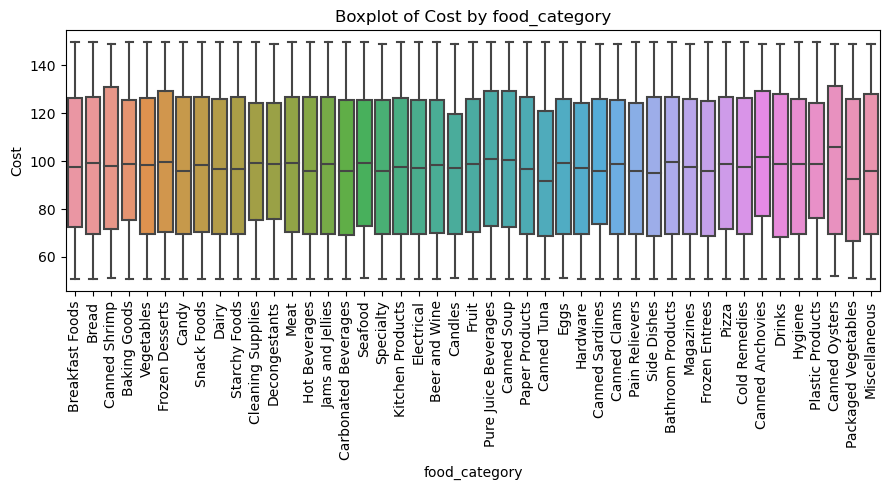

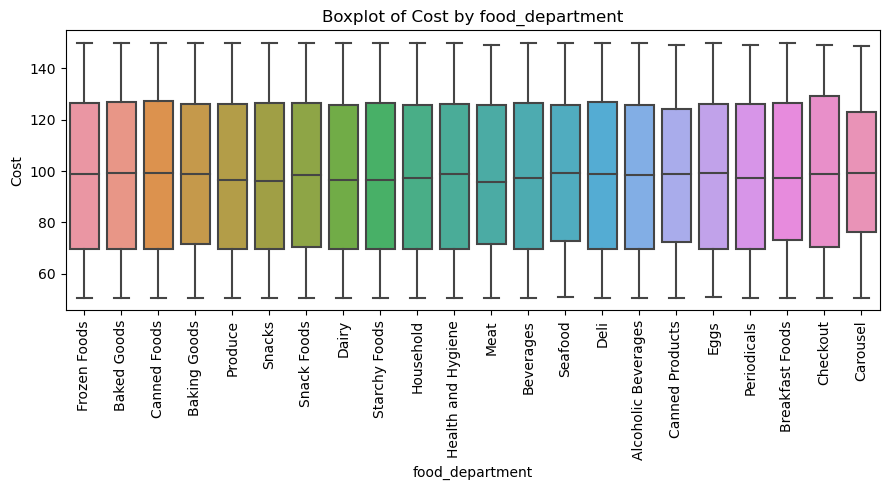

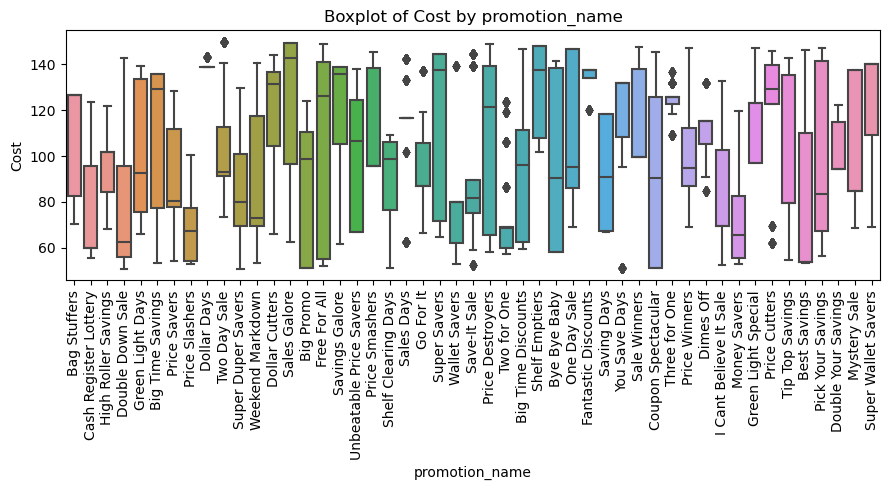

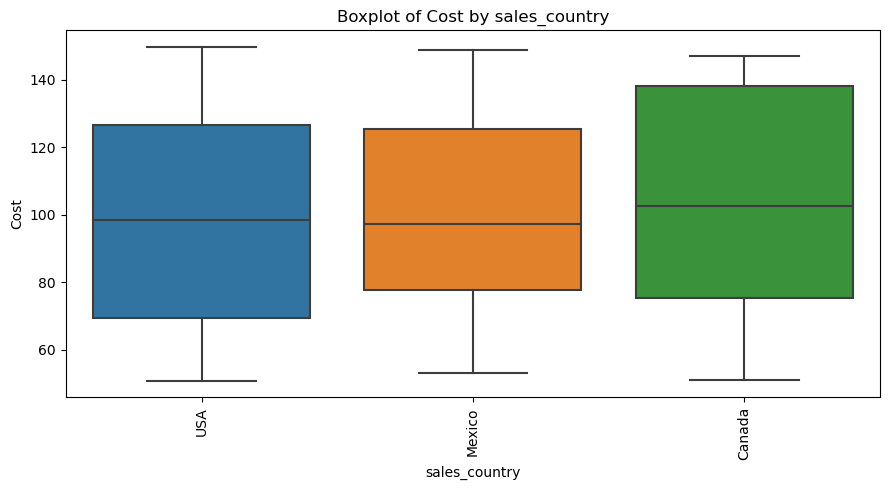

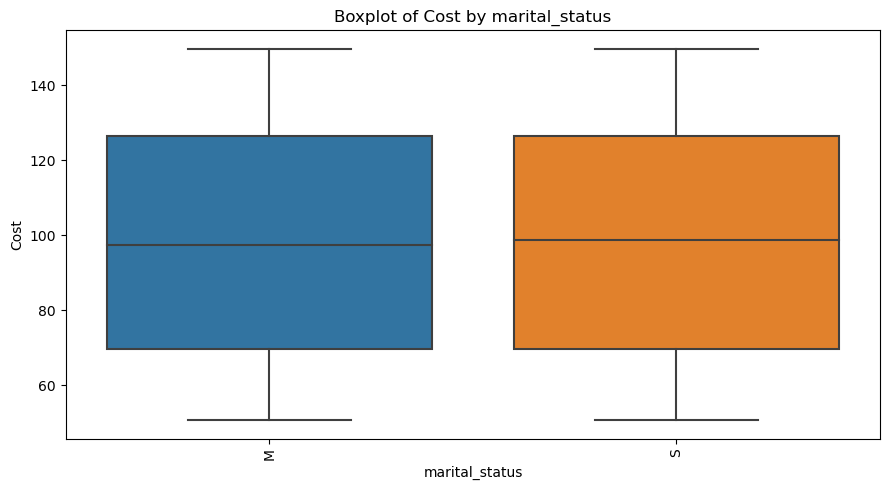

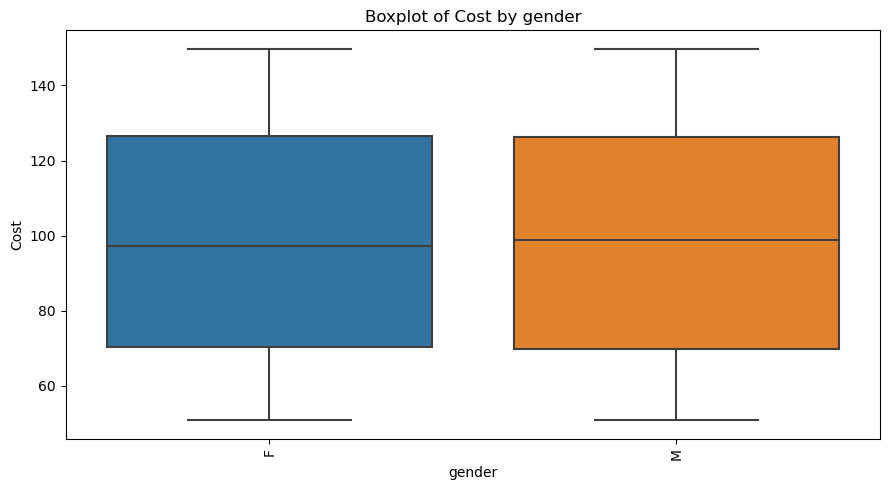

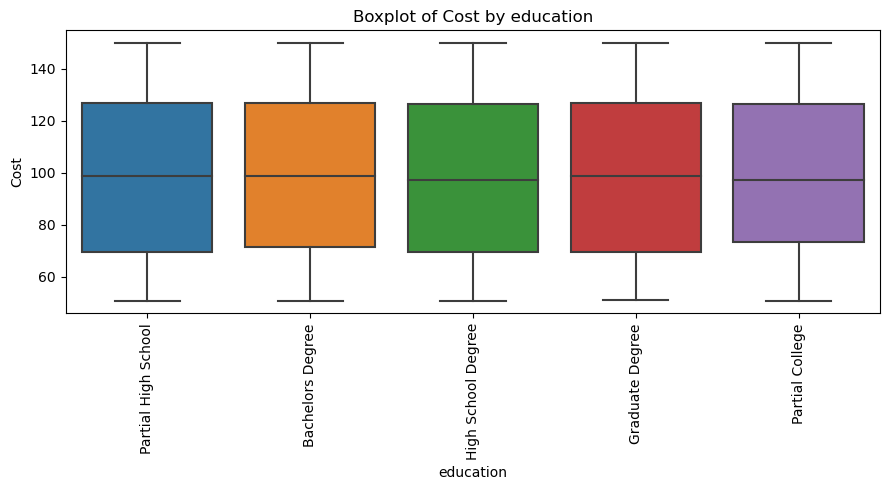

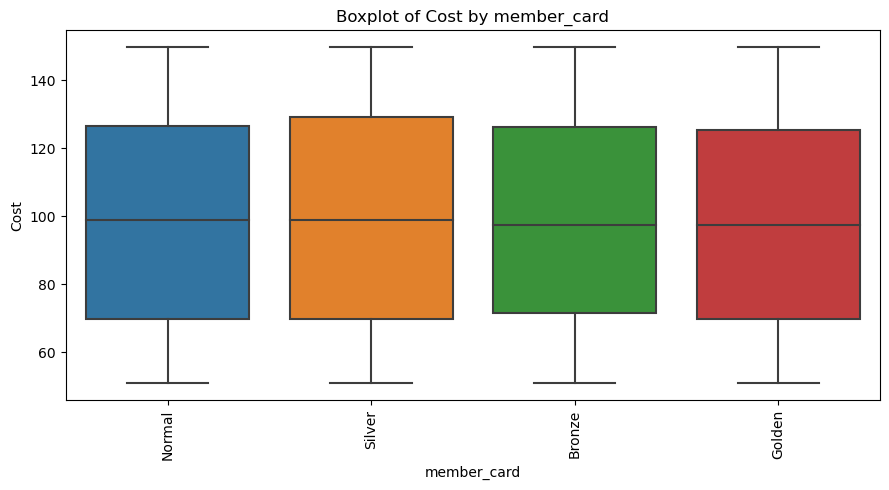

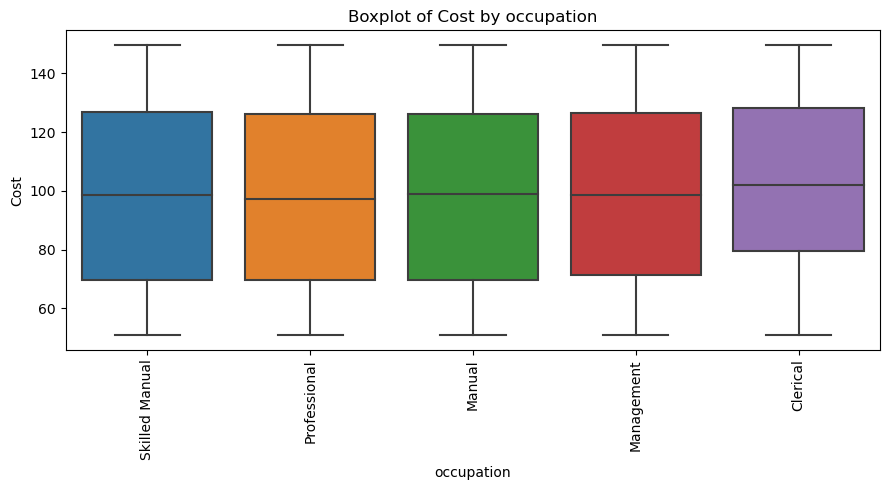

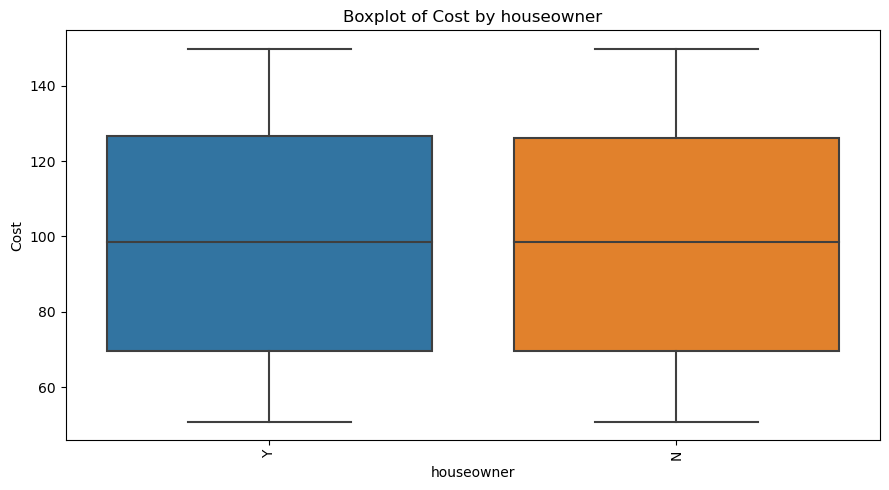

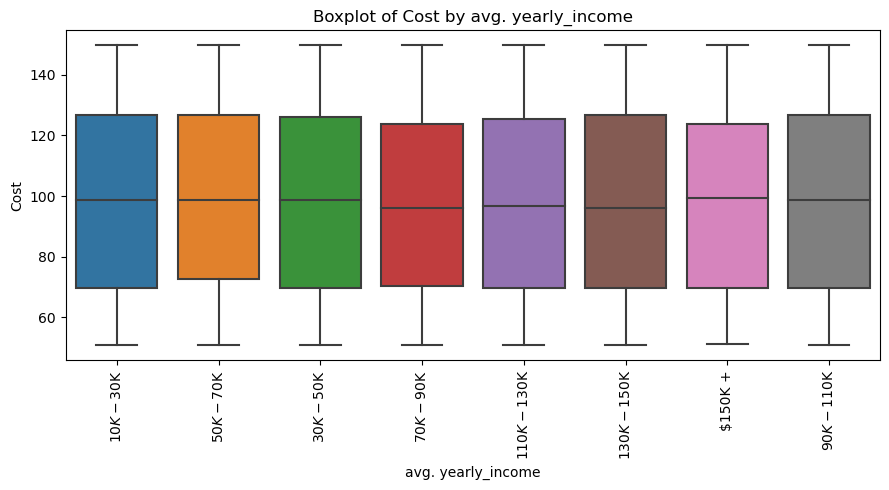

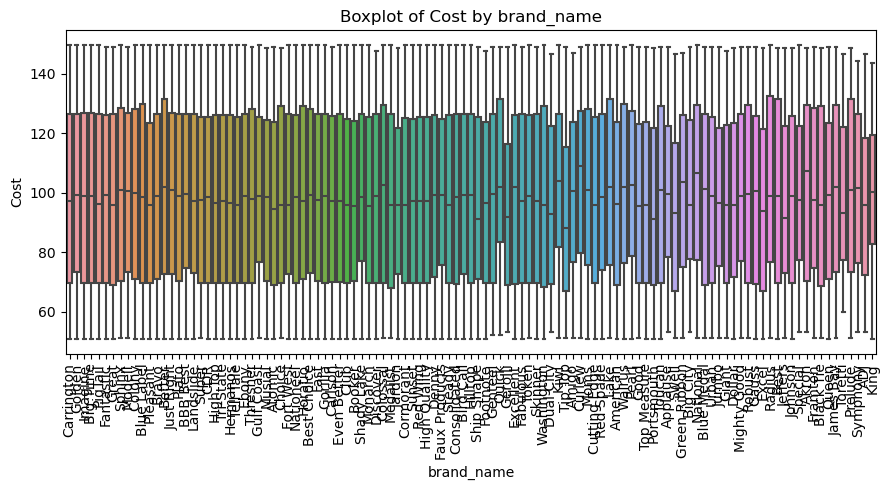

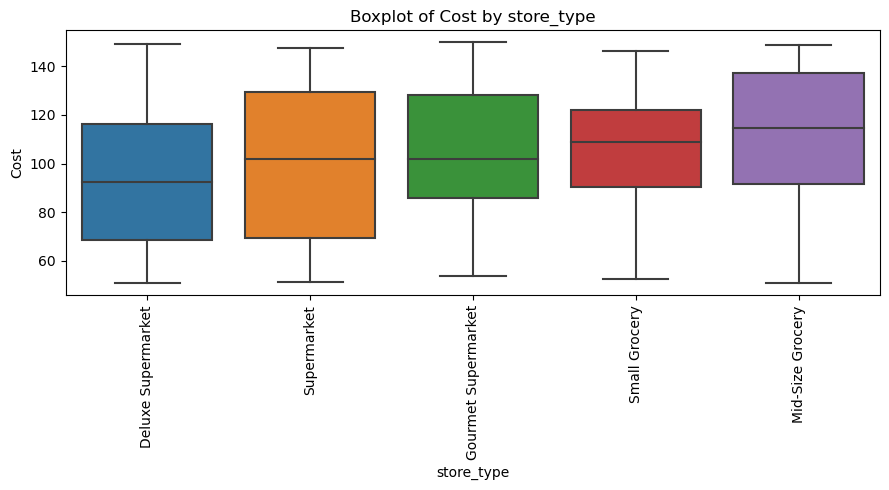

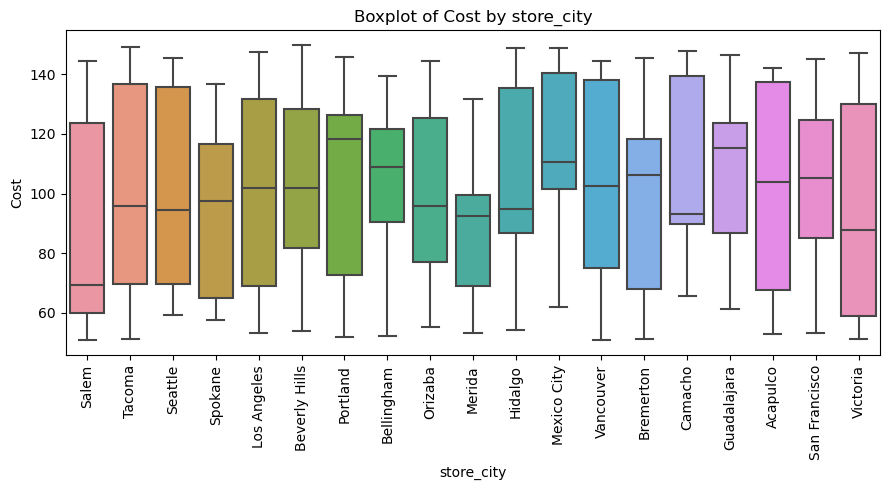

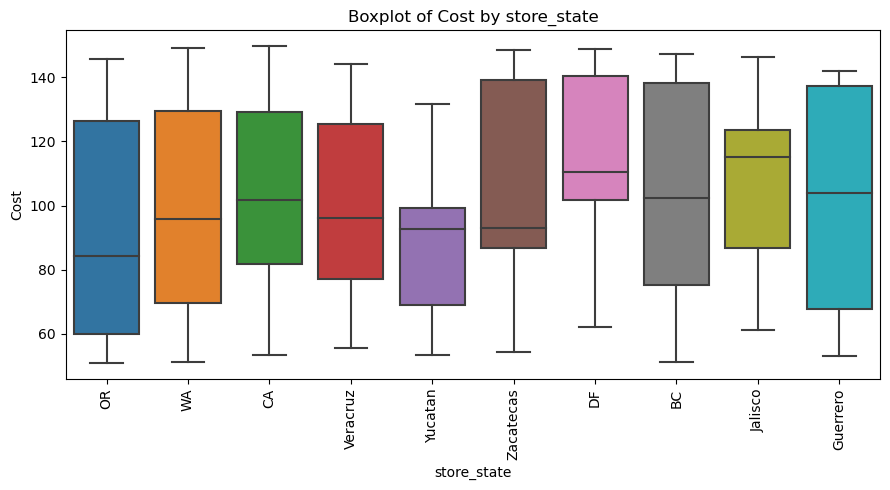

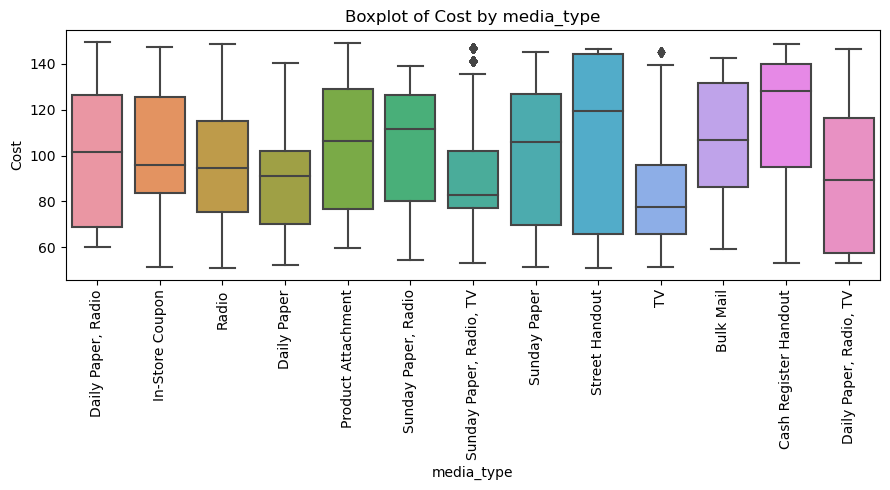

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical variables
categorical_vars = ['food_category', 'food_department', 'promotion_name', 'sales_country', 
                    'marital_status', 'gender', 'education', 'member_card', 'occupation', 
                    'houseowner', 'avg. yearly_income', 'brand_name', 'store_type', 
                    'store_city', 'store_state', 'media_type']

# Plot boxplots of cost for each category
for var in categorical_vars:
    plt.figure(figsize=(9, 5))
    sns.boxplot(x=var, y='cost', data=data)
    plt.title('Boxplot of Cost by {}'.format(var))
    plt.xlabel(var)
    plt.ylabel('Cost')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [16]:
numeric_df = data.select_dtypes(include='number')
print(numeric_df.columns)
my_corr_matrix = numeric_df.corr()
my_corr_matrix

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft',
       'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'cost'],
      dtype='object')


store_sales(in millions)  store_cost(in millions)  \
store_sales(in millions)                    1.000000                 0.954685   
store_cost(in millions)                     0.954685                 1.000000   
unit_sales(in millions)                     0.503482                 0.480087   
total_children                              0.083313                 0.079058   
avg_cars_at home(approx)                    0.004498                 0.002865   
num_children_at_home                        0.032437                 0.027576   
avg_cars_at home(approx).1                  0.004498                 0.002865   
SRP                                         0.833478                 0.795880   
gross_weight                                0.036179                 0.034237   
net_weight                                  0.032014                 0.030257   
recyclable_package                          0.034293                 0.030213   
low_fat                                    -0.006134                -0.005976   
units_per_case                             -0.010630                -0.009792   
store_sqft                                  0.015543                 0.017877   
grocery_sqft                                0.010442                 0.012884   
frozen_sqft                                 0.017886                 0.019245   
meat_sqft                                   0.017883                 0.019242   
coffee_bar                                 -0.029368                -0.027126   
video_store                                 0.019179                 0.019252   
salad_bar                                   0.031459                 0.033206   
prepared_food                               0.031459                 0.033206   
florist                                     0.030603                 0.030929   
cost                                       -0.004621                -0.004162   

                            unit_sales(in millions)  total_children  \
store_sales(in millions)                   0.503482        0.083313   
store_cost(in millions)                    0.480087        0.079058   
unit_sales(in millions)                    1.000000        0.163188   
total_children                             0.163188        1.000000   
avg_cars_at home(approx)                   0.023667        0.098110   
num_children_at_home                       0.066725        0.394709   
avg_cars_at home(approx).1                 0.023667        0.098110   
SRP                                       -0.002358        0.000545   
gross_weight                               0.001255       -0.000186   
net_weight                                 0.001137        0.000142   
recyclable_package                         0.001599        0.002794   
low_fat                                   -0.001129       -0.002824   
units_per_case                             0.000084        0.002307   
store_sqft                                 0.031464        0.000555   
grocery_sqft                               0.024857        0.018526   
frozen_sqft                                0.030563       -0.026926   
meat_sqft                                  0.030557       -0.026923   
coffee_bar                                -0.057633        0.002836   
video_store                                0.034996       -0.000591   
salad_bar                                  0.057878       -0.013764   
prepared_food                              0.057878       -0.013764   
florist                                    0.055885       -0.003361   
cost                                      -0.015015       -0.003900   

                            avg_cars_at home(approx)  num_children_at_home  \
store_sales(in millions)                    0.004498              0.032437   
store_cost(in millions)                     0.002865              0.027576   
unit_sales(in millions)                     0.023667              0.066725   
total_children                              0.098110              

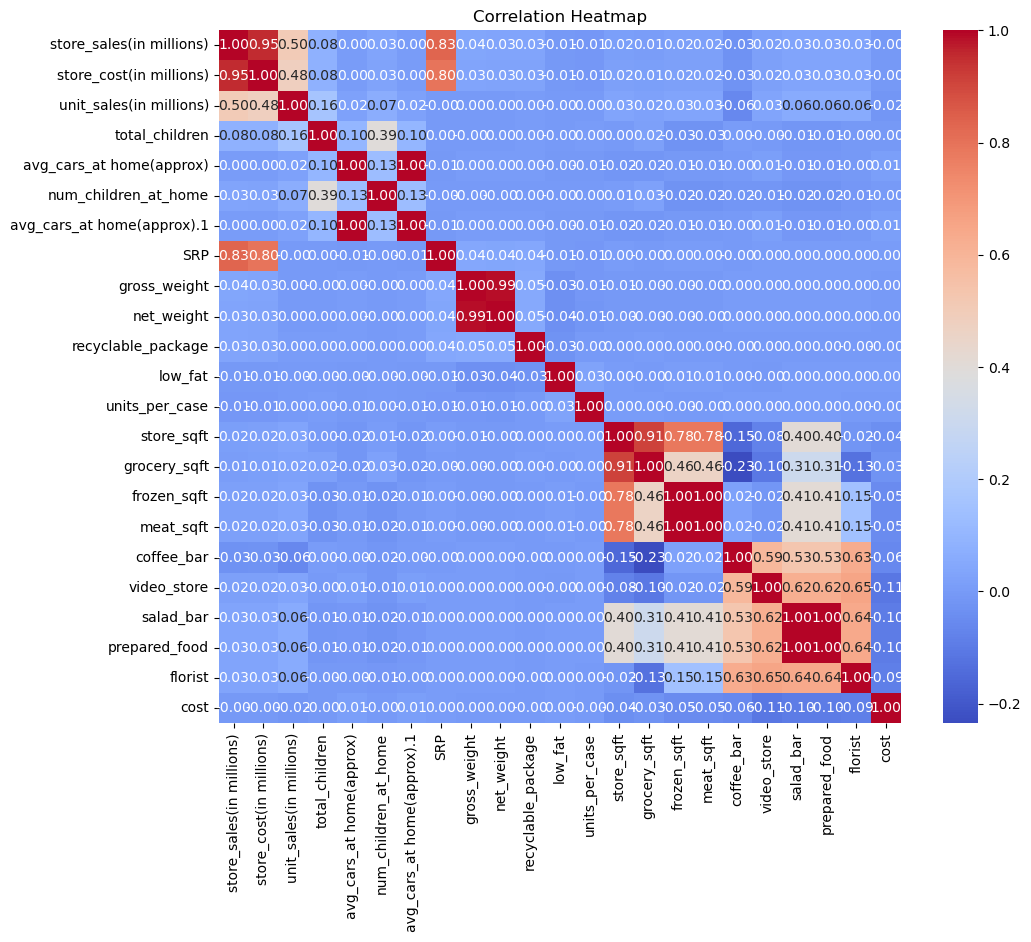

In [17]:
plt.figure(figsize=(11, 9))
sns.heatmap(my_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

* The above plots depict the highly correlated variables which can help us in removing certain variables because of redundancy.
* Keeping the threshold as 0.8 and -0.8 for strong correlation, we choose to remove the following columns which may increase the
  bias slightly but will make the model simpler
  * **store_sales and store_cost** as **SRP** is correlated with both of them (0.83 and 0.80)
  * **avg_cars_at home(approx).1** (corr is 1 with avg_cars_at_home(approx))
  * **meat_sqft** (corr is 1 with frozen_sqft)
  * **gross_weight** (corr is 0.99 with net_weight)
  * **grocery_sqft** (corr is 0.91 with store_sqft)
  * **salad_bar** (corr is 1 with prepared_food)

In [18]:
data = data.drop(columns=['store_cost(in millions)', 'avg_cars_at home(approx).1', 'meat_sqft', 'gross_weight', 'salad_bar', 'grocery_sqft'])

In [19]:
data.shape

(60428, 34)

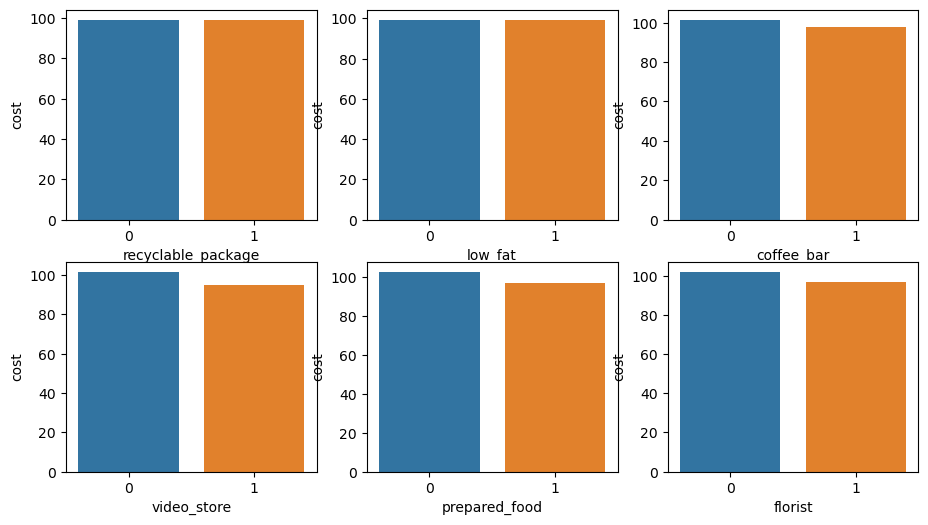

In [20]:
lst_cate = ['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'prepared_food', 'florist'] #
#------------------------------------------------------------------------------------------------------
rows = 2
columns = 3
count = 0
fig, axs = plt.subplots(rows, columns, figsize=(11,6))
for i in range(rows):
    for j in range(columns):
        sns.barplot(ax=axs[i, j], data=data.groupby(lst_cate[count])['cost'].mean().to_frame().reset_index()
                    , x=lst_cate[count], y='cost')
        count += 1

The above data is already given as binary in the dataset and it is very difficult to tell if there is significant variation across the classes in each variable. Hence we need to perform statistical testing using **T-Test**.

* **Null Hypothesis H0**: There is NO difference in lst_0 and lst_1 (avg of lst_0 == avg of lst_1)
* **Alternate Hypothesis Ha**: There is significant difference in lst_0 and lst_1 (avg of lst_0 != avg of lst_1)

In [21]:
alpha = .05
for i in lst_cate:
    lst_0 = data.cost[data[i] == 0]
    lst_1 = data.cost[data[i] == 1]
    t, p = ttest_ind(lst_0, lst_1, equal_var = False)
#--------------------------------------------------------------------------------
    print(f'p-value = {p:.2f}, alpha = {alpha:.2f}')
    if (p < alpha):
        print('p < alpha => reject H0 => there are differences across', i, 'categories', 'and cost')
    else:
        print('p > alpha => failed to reject H0 => there are NO differences across', i, 'categories', 'and cost')
    print('\n')

p-value = 0.67, alpha = 0.05
p > alpha => failed to reject H0 => there are NO differences across recyclable_package categories and cost


p-value = 0.30, alpha = 0.05
p > alpha => failed to reject H0 => there are NO differences across low_fat categories and cost


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences across coffee_bar categories and cost


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences across video_store categories and cost


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences across prepared_food categories and cost


p-value = 0.00, alpha = 0.05
p < alpha => reject H0 => there are differences across florist categories and cost




* From this it is clear that we can drop **recyclable_package** and **low_fat**

In [22]:
data = data.drop(columns=['recyclable_package', 'low_fat'])
data.shape

(60428, 32)

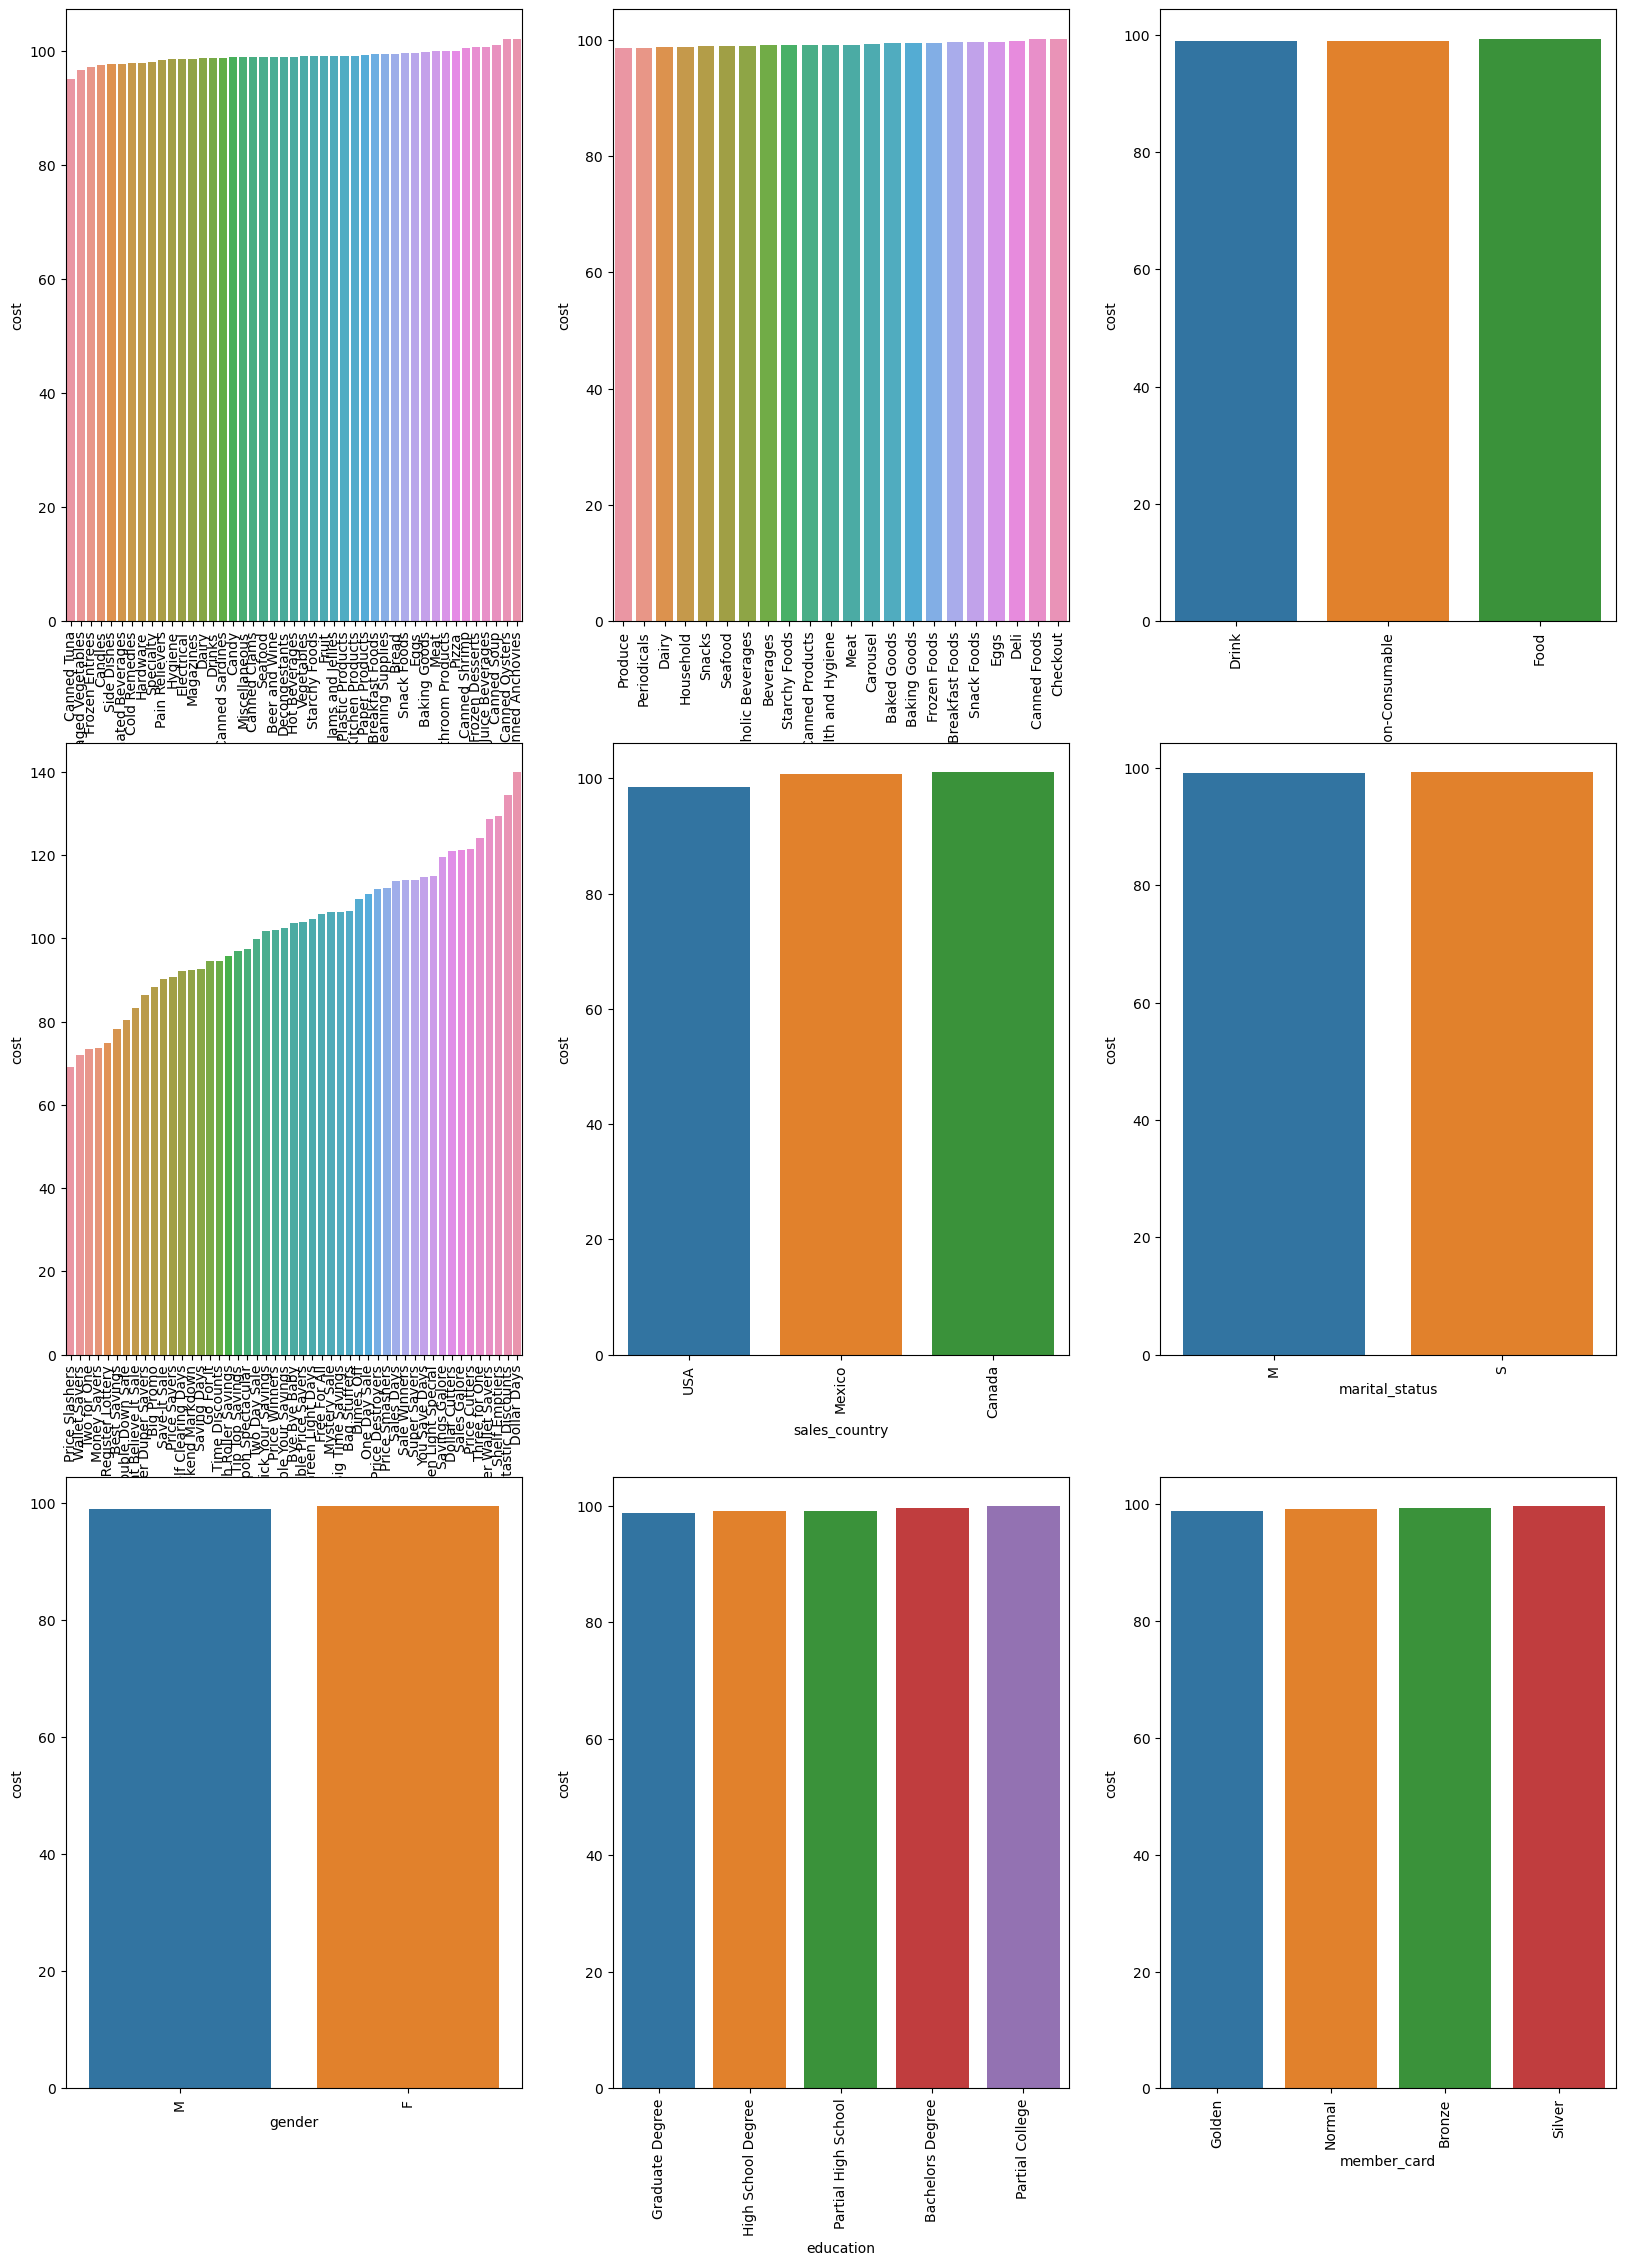

In [23]:
lst_cate_column = []
for column in data.columns:
    if (data[column].dtype == 'O'):
        lst_cate_column.append(column)
#----------------------------------------------------------------#
rows = 3
columns = 3
count = 0
fig, axs = plt.subplots(rows, columns, figsize=(20,27))
for i in range(rows):
    for j in range(columns):
        sns.barplot(ax=axs[i, j], data=data.groupby(lst_cate_column[count]
                                                   )['cost'].mean().sort_values().to_frame().reset_index()
                    , x=lst_cate_column[count], y='cost')
        axs[i, j].tick_params(axis='x', rotation=90)
        count += 1

In [24]:
categorical_variables = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Variables:", categorical_variables)


Categorical Variables: Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')


In [25]:
data = data.drop(columns=['food_category', 'food_department', 'food_family', 'gender', 'marital_status',
                         'brand_name', 'avg. yearly_income', 'education', 'member_card', 'houseowner', 
                          'sales_country', 'occupation'])
data.shape

(60428, 20)

In [29]:
categorical_variables = data.select_dtypes(include=['object', 'category'])

# Now, let's list out unique categories for each variable
for column in categorical_variables.columns:
    unique_categories = data[column].unique()
    print(f"Unique categories for variable '{column}':")
    print(unique_categories)
    print()

Unique categories for variable 'promotion_name':
['Bag Stuffers' 'Cash Register Lottery' 'High Roller Savings'
 'Double Down Sale' 'Green Light Days' 'Big Time Savings' 'Price Savers'
 'Price Slashers' 'Dollar Days' 'Two Day Sale' 'Super Duper Savers'
 'Weekend Markdown' 'Dollar Cutters' 'Sales Galore' 'Big Promo'
 'Free For All' 'Savings Galore' 'Unbeatable Price Savers'
 'Price Smashers' 'Shelf Clearing Days' 'Sales Days' 'Go For It'
 'Super Savers' 'Wallet Savers' 'Save-It Sale' 'Price Destroyers'
 'Two for One' 'Big Time Discounts' 'Shelf Emptiers' 'Bye Bye Baby'
 'One Day Sale' 'Fantastic Discounts' 'Saving Days' 'You Save Days'
 'Sale Winners' 'Coupon Spectacular' 'Three for One' 'Price Winners'
 'Dimes Off' 'I Cant Believe It Sale' 'Money Savers' 'Green Light Special'
 'Price Cutters' 'Tip Top Savings' 'Best Savings' 'Pick Your Savings'
 'Double Your Savings' 'Mystery Sale' 'Super Wallet Savers']

Unique categories for variable 'store_type':
['Deluxe Supermarket' 'Supermarket' '

* Grouping similar categories into broader groups to reduce the number of classes in a variable for simplicity

In [30]:
def group_promotion_categories(promotion_name):
    discount_sales = ['Double Down Sale', 'Big Time Savings', 'Price Savers', 'Price Slashers', 'Dollar Days', 
                      'Two Day Sale', 'Super Duper Savers', 'Weekend Markdown', 'Dollar Cutters', 'Big Promo', 
                      'Free For All', 'Unbeatable Price Savers', 'Price Smashers', 'Two for One', 
                      'Big Time Discounts', 'Bye Bye Baby', 'One Day Sale', 'Fantastic Discounts', 
                      'Saving Days', 'Sale Winners', 'Coupon Spectacular', 'Three for One', 'Price Winners', 
                      'Dimes Off', 'I Cant Believe It Sale', 'Money Savers', 'Price Cutters', 'Tip Top Savings', 
                      'Best Savings', 'Pick Your Savings', 'Double Your Savings', 'Mystery Sale', 
                      'Super Wallet Savers']
    
    clearance_sales = ['Shelf Clearing Days', 'Shelf Emptiers']
    
    special_sales = ['Go For It', 'You Save Days', 'Green Light Special']
    
    miscellaneous = ['Bag Stuffers', 'Cash Register Lottery', 'High Roller Savings', 'Green Light Days', 
                     'Sales Galore', 'Savings Galore', 'Save-It Sale']
    
    if promotion_name in discount_sales:
        return 'Discount Sales'
    elif promotion_name in clearance_sales:
        return 'Clearance Sales'
    elif promotion_name in special_sales:
        return 'Special Sales'
    else:
        return 'Miscellaneous'

# Apply the function to create a new column with broader categories
data['broad_promotion_category'] = data['promotion_name'].apply(group_promotion_categories)

data['broad_promotion_category'].unique()

array(['Miscellaneous', 'Discount Sales', 'Clearance Sales',
       'Special Sales'], dtype=object)

In [32]:
def group_media_categories(media_type):
    if 'Paper' in media_type:
        return 'Print Media'
    elif 'Radio' in media_type:
        return 'Radio'
    elif 'TV' in media_type:
        return 'TV'
    elif 'Handout' in media_type:
        return 'Handout'
    elif 'Bulk Mail' in media_type:
        return 'Bulk Mail'
    elif 'Product Attachment' in media_type:
        return 'Product Attachment'
    else:
        return 'Other'

# Apply the function to create a new column with broader categories
data['broad_media_type'] = data['media_type'].apply(group_media_categories)

data['broad_media_type'].unique()

array(['Print Media', 'Other', 'Radio', 'Product Attachment', 'Handout',
       'TV', 'Bulk Mail'], dtype=object)

In [34]:
categorical_variables = data.select_dtypes(include=['object', 'category'])

# Now, let's list out unique categories for each variable
for column in categorical_variables.columns:
    unique_categories = data[column].unique()
    print(f"Unique categories for variable '{column}':")
    print(unique_categories)
    print()

Unique categories for variable 'promotion_name':
['Bag Stuffers' 'Cash Register Lottery' 'High Roller Savings'
 'Double Down Sale' 'Green Light Days' 'Big Time Savings' 'Price Savers'
 'Price Slashers' 'Dollar Days' 'Two Day Sale' 'Super Duper Savers'
 'Weekend Markdown' 'Dollar Cutters' 'Sales Galore' 'Big Promo'
 'Free For All' 'Savings Galore' 'Unbeatable Price Savers'
 'Price Smashers' 'Shelf Clearing Days' 'Sales Days' 'Go For It'
 'Super Savers' 'Wallet Savers' 'Save-It Sale' 'Price Destroyers'
 'Two for One' 'Big Time Discounts' 'Shelf Emptiers' 'Bye Bye Baby'
 'One Day Sale' 'Fantastic Discounts' 'Saving Days' 'You Save Days'
 'Sale Winners' 'Coupon Spectacular' 'Three for One' 'Price Winners'
 'Dimes Off' 'I Cant Believe It Sale' 'Money Savers' 'Green Light Special'
 'Price Cutters' 'Tip Top Savings' 'Best Savings' 'Pick Your Savings'
 'Double Your Savings' 'Mystery Sale' 'Super Wallet Savers']

Unique categories for variable 'store_type':
['Deluxe Supermarket' 'Supermarket' '

In [35]:
from sklearn.preprocessing import OneHotEncoder

# Selecting only categorical variables
categorical_variables = data.select_dtypes(include=['object', 'category'])

# Encoding categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(categorical_variables)

# Converting the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_variables.columns))

# Concatenating the encoded DataFrame with the original data, while dropping the original categorical variables
data_encoded = pd.concat([data.drop(columns=categorical_variables.columns), encoded_df], axis=1)

# Displaying the encoded data
data_encoded.head()


store_sales(in millions)  unit_sales(in millions)  total_children  \
0                      7.36                        4               1   
1                      5.52                        3               0   
2                      3.68                        2               4   
3                      3.68                        2               2   
4                      4.08                        3               0   

   avg_cars_at home(approx)  num_children_at_home   SRP  net_weight  \
0                         1                     1  1.84       17.70   
1                         4                     0  1.84       17.70   
2                         1                     0  1.84       17.70   
3                         2                     2  1.84       17.70   
4                         2                     0  1.36        5.11   

   units_per_case  store_sqft  frozen_sqft  coffee_bar  video_store  \
0              17       27694         5415           1            1   
1              17       27694         5415           1            1   
2              17       27694         5415           1            1   
3              17       27694         5415           1            1   
4              29       27694         5415           1            1   

   prepared_food  florist    cost  promotion_name_Best Savings  \
0              1        1  126.62                          0.0   
1              1        1   59.86                          0.0   
2              1        1   84.16                          0.0   
3              1        1   95.78                          0.0   
4              1        1   50.79                          0.0   

   promotion_name_Big Promo  promotion_name_Big Time Discounts  \
0                       0.0                                0.0   
1                       0.0                                0.0   
2                       0.0                                0.0   
3                       0.0                                0.0   
4                       0.0                                0.0   

   promotion_name_Big Time Savings  promotion_name_Bye Bye Baby  ...  \
0                              0.0                          0.0  ...   
1                              0.0                          0.0  ...   
2                              0.0                          0.0  ...   
3                              0.0                          0.0  ...   
4                              0.0                          0.0  ...   

   media_type_Daily Paper  media_type_Daily Paper, Radio  \
0                     0.0                            1.0   
1                     0.0                            1.0   
2                     0.0                            1.0   
3                     0.0                            0.0   
4                     0.0                            0.0   

   media_type_Daily Paper, Radio, TV  media_type_In-Store Coupon  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         1.0   
4                                0.0                         0.0   

   media_type_Product Attachment  media_type_Radio  media_type_Street Handout  \
0                            0.0               0.0                        0.0   
1                            0.0               0.0                        0.0   
2                            0.0               0.0                        0.0   
3                            0.0               0.0                        0.0   
4                            0.0               1.0                        0.0   

   media_type_Sunday Paper  media_type_Sunday Paper, Radio  \
0                      0.0                             0.0   
1                      0.0                             0.0   
2                      0.0                    

# Modelling

In [36]:
import statsmodels.api as sm

# Define X and y
X = data_encoded.drop(columns=['cost'])
y = data_encoded['cost']

# Add constant to X
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     379.9
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        16:20:35   Log-Likelihood:            -2.7810e+05
No. Observations:               60428   AIC:                         5.564e+05
Df Residuals:                   60340   BIC:                         5.572e+05
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [37]:
from sklearn.tree import DecisionTreeRegressor

x = data_encoded.drop('cost', axis=1)
y = data_encoded['cost']

importances_list = []

times = 20
for i in range(times):
    model = DecisionTreeRegressor()
    model.fit(x, y)

    y_pred = model.predict(x)

    value = abs(model.feature_importances_) / (abs(model.feature_importances_).mean())
    importances_list.append(value)


importance_df = pd.DataFrame(importances_list, columns=x.columns)
importance_df = importance_df.sum(axis=0)

print("General Importance of Columns:")
print(importance_df.sort_values(ascending=False).round(3)/times)

General Importance of Columns:
frozen_sqft                                7.88855
store_sqft                                 6.19440
promotion_name_Save-It Sale                3.79305
promotion_name_Free For All                3.65265
broad_promotion_category_Discount Sales    3.42990
                                            ...   
store_city_Portland                        0.01430
promotion_name_Saving Days                 0.01365
unit_sales(in millions)                    0.01175
store_city_Los Angeles                     0.00820
store_city_Victoria                        0.00065
Length: 114, dtype: float64


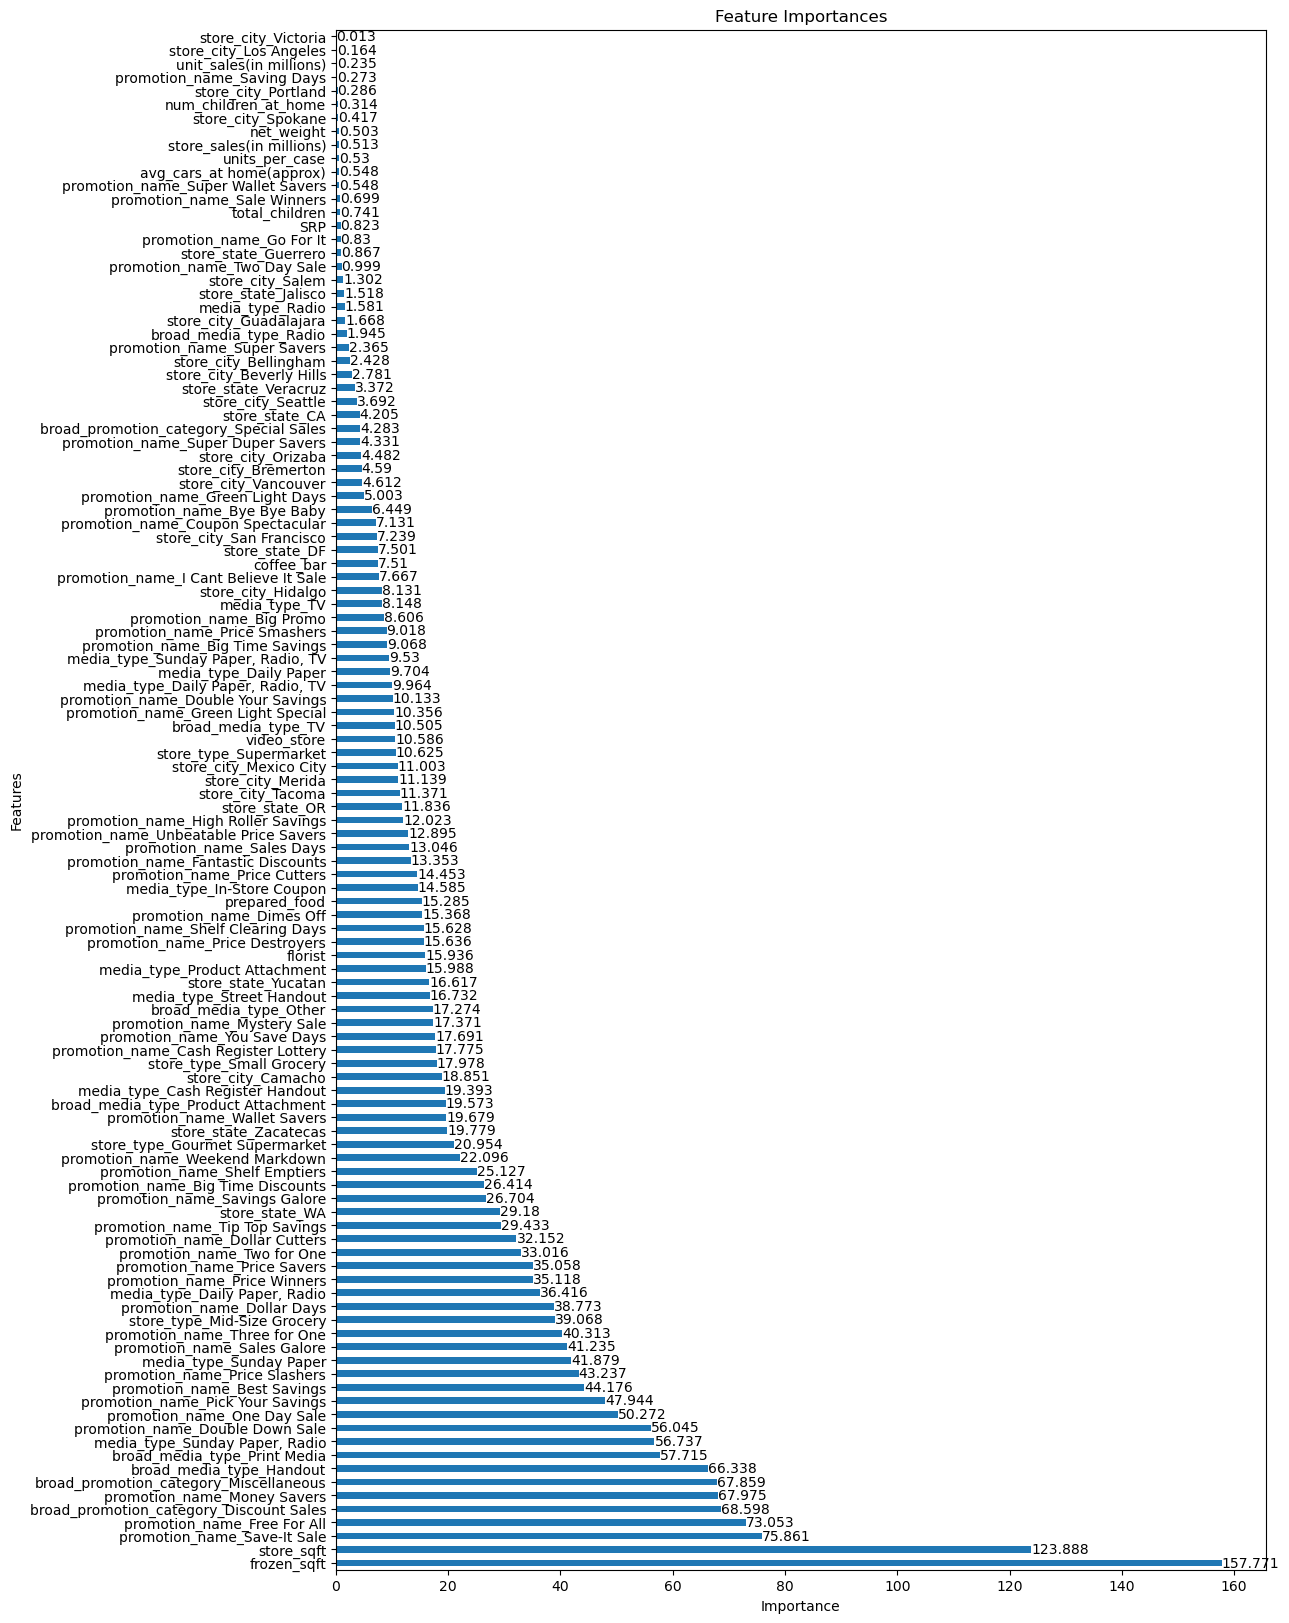

In [38]:
import matplotlib.pyplot as plt

# Sort feature importances
sorted_importances = importance_df.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 20))  # Adjust figsize to accommodate rotated plot
ax = sorted_importances.plot(kind='barh')  # Use barh for horizontal bar plot
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

# Annotate the values
for i, v in enumerate(sorted_importances):
    ax.text(v + 0.01, i, str(round(v, 3)), va='center')  # Adjust text position and formatting as needed

plt.show()


In [39]:
X = data_encoded.drop('cost', axis=1)
y = data_encoded['cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Linear Regression Model

In [40]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [41]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 573.507854157967
Root Mean Squared Error (RMSE): 23.948024013641856
Mean Absolute Error (MAE): 19.615380221780818
R-squared (R²): 0.36554698660582896


## Polynomial Regression using Lasso

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

# Define estimator: use make_pipeline to combine two functions.
poly_grid = PolynomialFeatures()
lasso_grid = Lasso()

# Apply polynomial regression in pipeline
poly_lasso_grid = make_pipeline(poly_grid, lasso_grid)

# Define grid of parameter.
param_grids = {
    'polynomialfeatures__degree': [2],
    'lasso__alpha': [0.01, 0.1]
}

# Define GridSearchCV Estimation function, then train the model
poly_lasso_grid_reg = GridSearchCV(poly_lasso_grid, param_grids, cv=5)


In [43]:
poly_lasso_grid_reg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.01, 0.1],
                         'polynomialfeatures__degree': [2]})

In [44]:
# Make predictions on the testing data
y_pred = poly_lasso_grid_reg.predict(X_test)

In [45]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 10.561212742387216
Root Mean Squared Error (RMSE): 3.2498019543330967
Mean Absolute Error (MAE): 1.8753950582620307
R-squared (R²): 0.9883164751782826


In [46]:
poly_lasso_grid_reg.best_params_

{'lasso__alpha': 0.01, 'polynomialfeatures__degree': 2}

In [47]:
poly_lasso_grid_reg.best_score_

0.9880256384085075

## Decision Tree and Random Forest Regressors

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the decision tree regressor model
dtr_model = DecisionTreeRegressor()

# Train the model on the training data
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
# Make predictions on the testing data
y_pred_dtr = dtr_model.predict(X_test)

In [50]:
# Evaluate the model
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
rmse_dtr = np.sqrt(mse)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

print("Mean Squared Error (MSE):", mse_dtr)
print("Root Mean Squared Error (RMSE):", rmse_dtr)
print("Mean Absolute Error (MAE):", mae_dtr)
print("R-squared (R²):", r2_dtr)


Mean Squared Error (MSE): 2.8500128351095526
Root Mean Squared Error (RMSE): 3.2498019543330967
Mean Absolute Error (MAE): 0.08210299861011822
R-squared (R²): 0.9968471238565649


Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor model
model_rrr = RandomForestRegressor(n_estimators=50, random_state=42)  # You can adjust n_estimators as needed

# Train the model on the training data
model_rrr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [52]:
# Make predictions on the testing data
y_pred_rrr = model_rrr.predict(X_test)

# Evaluate the model
mse_rrr = mean_squared_error(y_test, y_pred_rrr)
rmse_rrr = np.sqrt(mse_rrr)
mae_rrr = mean_absolute_error(y_test, y_pred_rrr)
Accuracy_rrr = model_rrr.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse_rrr)
print("Root Mean Squared Error (RMSE):", rmse_rrr)
print("Mean Absolute Error (MAE):", mae_rrr)
print("Accuracy:", Accuracy_rrr)

Mean Squared Error (MSE): 1.2693875798821743
Root Mean Squared Error (RMSE): 1.1266710167045988
Mean Absolute Error (MAE): 0.07544894419817211
Accuracy: 0.9985957179672739
